In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import wget
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearnex import patch_sklearn, config_context
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### Dataset

In this homework, we will use the California Housing Prices data from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```
We'll keep working with the `'median_house_value'` variable, and we'll transform it to a classification task. 
 



In [2]:
wget.download("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

100% [..........................................................................] 1423529 / 1423529

'housing.csv'

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`,
* `'ocean_proximity'`,



In [3]:
select_cols = ["latitude", "longitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", 
               "median_income", "median_house_value", "ocean_proximity"]
               
csv_path = "./housing.csv"
df = pd.read_csv(csv_path, usecols=select_cols)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### some basic data cleaning:

1. We've only selected columns of interest. Reduces memory footprint. 
2. Replacing upper case with lower case, and replacing spaces with underscores

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# for column names:

df.columns = df.columns.str.lower().str.replace(' ', '_')

# for data in the dataframe:

strings = list(df.dtypes[df.dtypes == 'object'].index)
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,near_bay
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,near_bay
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,near_bay
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,near_bay
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,near_bay


3. Leaving dtype conversions of each column
4. Moving on to data visualization"

C:\Users\Mona\AppData\Local\Temp\ipykernel_15788\726926412.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=100, ax=ax, layout=(3, 3), column=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms",


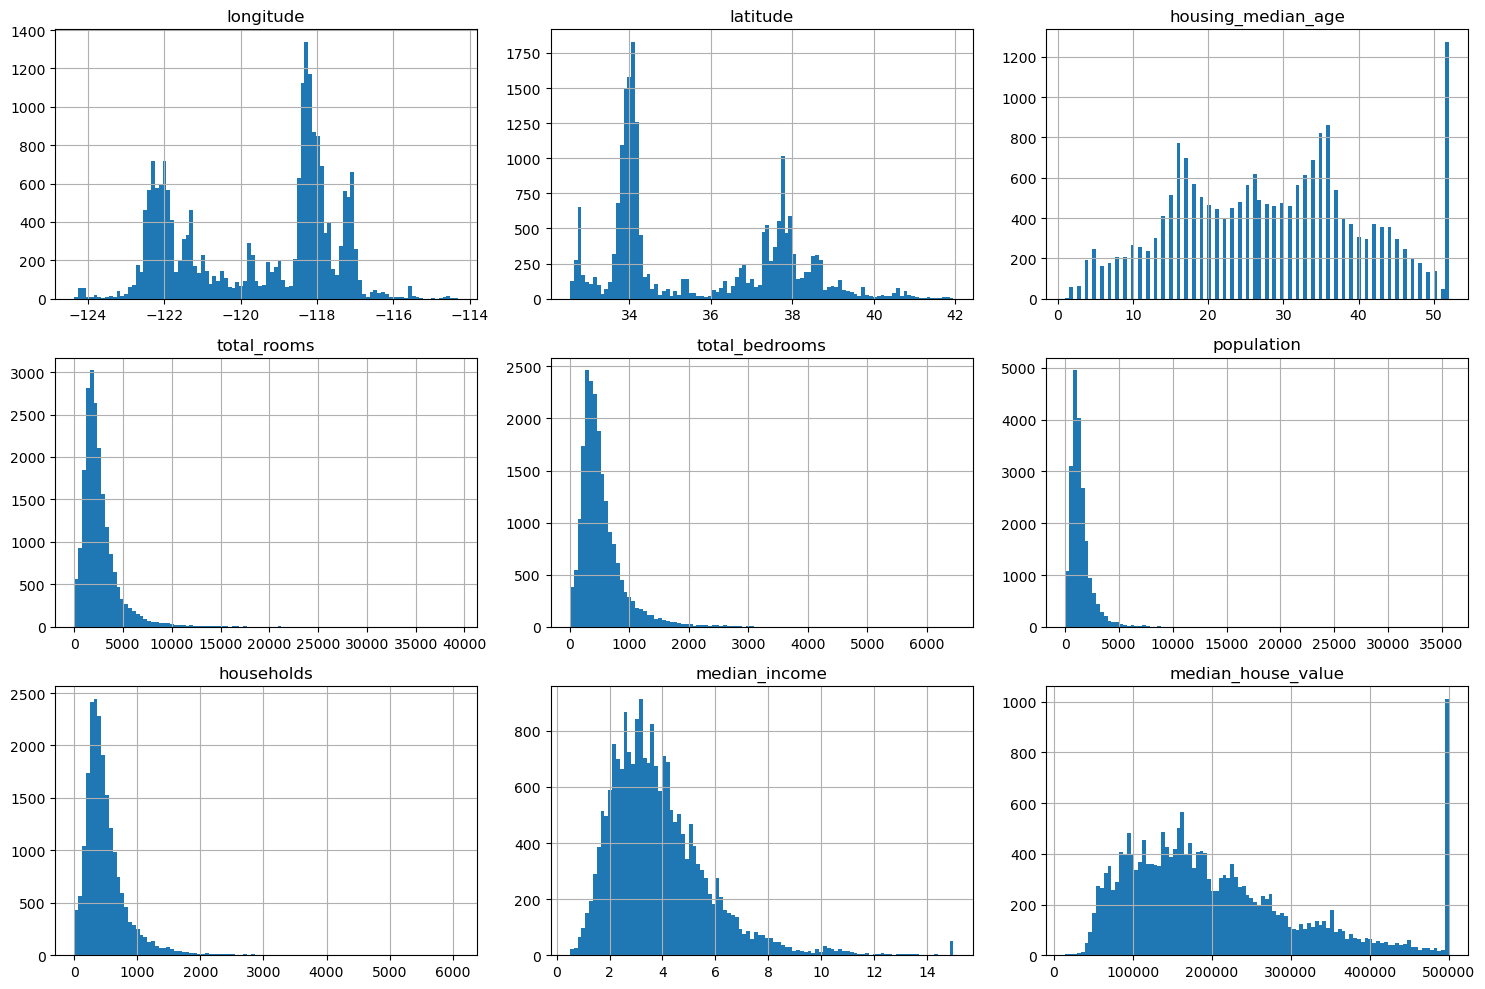

In [6]:
# INSPECTING HISTOGRAM:

fig = plt.figure(figsize=(15,10))
ax = plt.gca()
df.hist(bins=100, ax=ax, layout=(3, 3), column=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", 
                                                  "population", "households", "median_income", "median_house_value"])
plt.tight_layout()
plt.show()

Target variable median_house_value has a tail. Rest relatively normal, except median income and median house age.

In [7]:
df.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


### Data preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe. 
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe. 
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe. 




In [8]:
# checking if any missing values exist in any of the missing columns:
df.isna().sum(axis=0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
column_names = df.columns[df.isnull().any()].to_list()

for column in column_names:
    df[column].fillna(0, inplace=True) 
    
df.isna().sum(axis=0)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Creating new columns: 

* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe. 
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe. 
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe. 

In [10]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"] = df["population"]/df["households"]

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay,6.281853,0.172096,2.181467


### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:
* `NEAR BAY`
* `<1H OCEAN`
* `INLAND`
* `NEAR OCEAN`





In [11]:
df.ocean_proximity.mode()

0    <1h_ocean
Name: ocean_proximity, dtype: object

## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.



In [12]:
features = df.drop(columns = "median_house_value")
features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,near_bay,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,near_bay,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,near_bay,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,near_bay,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,near_bay,6.281853,0.172096,2.181467


In [13]:
target = df["median_house_value"]

In [14]:
from sklearn.model_selection import train_test_split

x_train_full, x_test, y_train_full, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.25, random_state=42)

splits = [x_train_full, x_train, x_val, x_test]
for split in splits:
        split.reset_index(inplace = True)
        
splits = [y_train_full,y_train, y_val, y_test]
for split in splits:
         split.reset_index(drop = True, inplace = True)


### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* `total_bedrooms` and `households`
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`




In [15]:
numeric_columns = list(x_train.dtypes[x_train.dtypes != "object"].index)

corr_matrix = x_train[numeric_columns].corr().abs()
type(corr_matrix)
# get upper triangular matrix becuase value will be reflected along the diagonal and return index of maximum values:

pandas.core.frame.DataFrame

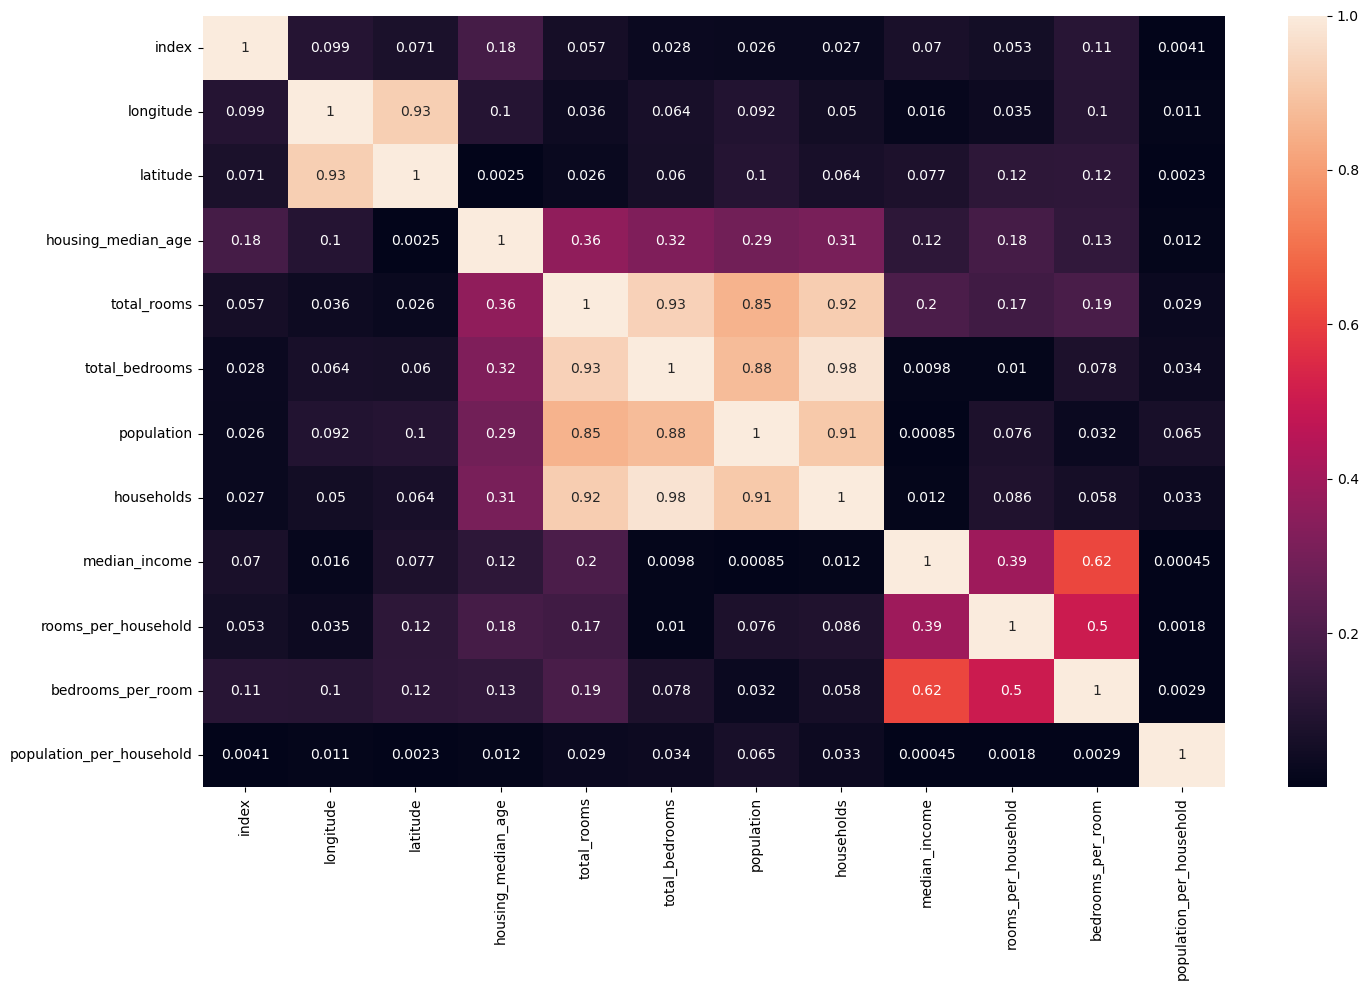

In [16]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
sns.heatmap(corr_matrix, ax=ax, annot=True)
plt.tight_layout()
plt.show()

In [17]:
corr_numpy  = corr_matrix.to_numpy()
# np.shape(corr_numpy) # dont use len, size
upper_indices = np.triu_indices(np.shape(corr_numpy)[0], 1)
max_ind = np.argmax(corr_numpy[upper_indices])
upper_indices[0][max_ind], upper_indices[1][max_ind]

(5, 7)

In [18]:
corr_matrix.index[upper_indices[0][max_ind]]

'total_bedrooms'

In [19]:
corr_matrix.columns[upper_indices[1][max_ind]]

'households'

Total bedrooms and households

### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.



In [20]:
type(y_train)

pandas.core.series.Series

In [21]:
y_train_bin = y_train.copy()
y_val_bin = y_val.copy()

average= y_train_bin.mean()
binarize = lambda x: 1 if x> average else 0

y_train_bin = y_train_bin.apply(binarize)
y_val_bin = y_val_bin.apply(binarize)

### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

Options:
- 0.26
- 0
- 0.10
- 0.16




In [22]:
categorical_columns = list(x_train.dtypes[x_train.dtypes == "object"].index)
categorical_columns

['ocean_proximity']

In [23]:
from sklearn.metrics import mutual_info_score

for column in categorical_columns:
    print(round(mutual_info_score(x_train[column], y_train_bin),2))


0.1


### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- 0.84
- 0.95




One hot encoding of ocean_proximity:

In [24]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = x_train.to_dict(orient='records')
x_train_OH = dv.fit_transform(train_dict)

val_dict = x_val.to_dict(orient='records')
x_val_OH = dv.transform(val_dict)


In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(x_train_OH, y_train_bin)
y_pred = model.predict(x_val_OH)

In [26]:
from sklearn.metrics import accuracy_score

original_features_accuracy = round(accuracy_score(y_val_bin, y_pred),2)
original_features_accuracy

0.83

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`

> **note**: the difference doesn't have to be positive




In [27]:
column_names = x_train.columns
accuracy_scores = []

for column in column_names:
    
    x_train_dropped = x_train.drop(columns=column)
    
    train_dict = x_train_dropped.to_dict(orient='records')
    x_train_dropped_OH = dv.fit_transform(train_dict)

    val_dict = x_val.to_dict(orient='records')
    x_val_dropped_OH = dv.transform(val_dict)
    
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(x_train_dropped_OH, y_train_bin)
    y_pred = model.predict(x_val_dropped_OH)
    
    accuracy_scores.append(round(accuracy_score(y_val_bin, y_pred),2))
    

In [28]:
diff_accuracy = []
for i in range(len(accuracy_scores)):    
    diff_accuracy.append(original_features_accuracy - accuracy_scores[i])
    
diff_accuracy = list(map(abs, diff_accuracy))
smallest_diff_accuracy = min(diff_accuracy)
index_list = [index for index in range(len(diff_accuracy)) if diff_accuracy[index] == smallest_diff_accuracy]
smallest_diff_feat = [column_names[index] for index in index_list]

print("Accuracy values are: ", accuracy_scores[1:] )
print("\ndifference values are: ", diff_accuracy)
print ("\nThe feature whose absence creates the smallest difference is: ", smallest_diff_feat)


Accuracy values are:  [0.83, 0.84, 0.83, 0.83, 0.84, 0.83, 0.84, 0.79, 0.82, 0.83, 0.83, 0.84]

difference values are:  [0.010000000000000009, 0.0, 0.010000000000000009, 0.0, 0.0, 0.010000000000000009, 0.0, 0.010000000000000009, 0.039999999999999925, 0.010000000000000009, 0.0, 0.0, 0.010000000000000009]

The feature whose absence creates the smallest difference is:  ['longitude', 'housing_median_age', 'total_rooms', 'population', 'rooms_per_household', 'bedrooms_per_room']


In [29]:
question_feat = ['total_rooms', 'total_bedrooms', 'population', 'households']
[feat for feat in smallest_diff_feat if feat in question_feat]

['total_rooms', 'population']

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:
- 0
- 0.01
- 0.1
- 1
- 10





In [30]:
log_target = np.log1p(target)
log_target.head()

0    13.022766
1    12.789687
2    12.771673
3    12.740520
4    12.743154
Name: median_house_value, dtype: float64

In [31]:
x_train_full, x_test, y_train_full, y_test = train_test_split(features, log_target, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.25, random_state=42)

splits = [x_train_full, x_train, x_val, x_test]
for split in splits:
        split.reset_index(inplace = True)
        
splits = [y_train_full,y_train, y_val, y_test]
for split in splits:
         split.reset_index(drop = True, inplace = True)


In [32]:
def calculate_rmse(y_test, y_pred):
    error = y_pred - y_test
    mse = (error ** 2).mean()
    rmse =np.sqrt(mse)
    return rmse

In [33]:
dv = DictVectorizer(sparse=False)

train_dict = x_train_full.to_dict(orient='records')
x_train_full_OH = dv.fit_transform(train_dict)

test_dict = x_test.to_dict(orient='records')
x_test_OH = dv.transform(test_dict)


In [34]:
from sklearn.linear_model import Ridge

alpha_values = [0, 0.01, 0.1, 1, 10]
RMSE = []

for alpha in alpha_values:
    model = Ridge(alpha=alpha, solver="sag", random_state=42)
    model.fit(x_train_full_OH, y_train_full)
    y_pred = model.predict(x_test_OH)
     
    rmse = calculate_rmse(y_test, y_pred)     
    RMSE.append(round(rmse,3))
    
best_RMSE = min(RMSE)
index_list = [index for index in range(len(RMSE)) if RMSE[index] == best_RMSE]
best_alpha_values = [alpha_values[index] for index in index_list]

print("RSME values are: ", RMSE)
print("Best alpha values are: ", best_alpha_values)
print ("The smallest best alpha value is: ", min(best_alpha_values))


RSME values are:  [0.564, 0.564, 0.564, 0.564, 0.564]
Best alpha values are:  [0, 0.01, 0.1, 1, 10]
The smallest best alpha value is:  0
